# How Can a Wellness Technology Company Play It Smart?
 ### A Bellabeat data analysis case study!

## About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.
By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

## BUSINESS TASK:
Using trends in smart device usage to understand customers and improve marketing strategy

### SOURCE:
The data source used for the case study is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius
   These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.  Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B).  Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.  
   ##### key points to note:
   * Due to the size of the data it can't be a full representation of the population so bias is expected.
   * The data set consist of 18 csv documents, Each document represents different quantitative data tracked by Fitbit. The data is consider long as the rows are longer than the columns.
   * The lack of the demography and the duration of the sample date will cause a limitation in the analysis of the data

I will be using Python for the analysis due to the size of the data and it's ablity to create visuials which I'll need to present to the stakeholders

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import datetime as dt
import os
%matplotlib inline

import warnings; warnings.filterwarnings('ignore')

The focus of our analysis will be on the following datasets:
* daily_activity
* daily_sleep
* hourly_steps

## Data preview

In [2]:
# load data
daily_activity = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

In [3]:
# preview the data
print('Number of Rows and Columns: ', daily_activity.shape)
daily_activity.head()

Number of Rows and Columns:  (940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
print('Number of Rows and Columns: ',daily_sleep.shape)
daily_sleep.head()

Number of Rows and Columns:  (413, 5)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
print('Number of Rows and Columns: ',hourly_steps.shape)
hourly_steps.head()

Number of Rows and Columns:  (22099, 3)


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


## Data cleaning

In [6]:
# clean up the data
# check out unqiue users
print(daily_activity['Id'].nunique())
print(daily_sleep['Id'].nunique())
print(hourly_steps['Id'].nunique())

33
24
33


In [7]:
# remove duplicate
daily_activity.drop_duplicates(inplace = True)
print(daily_activity.shape)
daily_sleep.drop_duplicates(inplace = True)
print(daily_sleep.shape)
hourly_steps.drop_duplicates(inplace = True)
print(hourly_steps.shape)

(940, 15)
(410, 5)
(22099, 3)


There is a 3 row reduction in the daily_sleep dataframe 

* To join the tables standardization of the date format is needed

In [8]:
#convert column to date type and rename
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate']).dt.date
daily_activity.rename(columns = {'ActivityDate' : 'Date'}, inplace = True)
print(daily_activity.head())
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay']).dt.date
daily_sleep.rename(columns = {'SleepDay': 'Date'}, inplace = True)
print(daily_sleep.head())

           Id        Date  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366  2016-04-12       13162           8.50             8.50   
1  1503960366  2016-04-13       10735           6.97             6.97   
2  1503960366  2016-04-14       10460           6.74             6.74   
3  1503960366  2016-04-15        9762           6.28             6.28   
4  1503960366  2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06      

## Data processing

In [9]:
# merge the daily_activity and daily_sleep table
daily_activity_sleep = pd.merge(left = daily_activity, right = daily_sleep, how = 'inner', left_on = ['Id', 'Date'], right_on = ['Id', 'Date'])
daily_activity_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [10]:
daily_activity_sleep.shape

(410, 18)

In [11]:
daily_activity_sleep.isna().sum()

Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64

## Data analyzing
Analyze data for any trend to help the in marketing strategy

In [12]:
# get the statistical info about the data
daily_activity_sleep.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,8514.909756,6.012390,6.007366,0.108867,1.446220,0.743902,3.791122,0.000927,25.046341,17.924390,216.541463,712.100000,2389.295122,1.119512,419.173171,458.482927
std,2.060863e+09,4157.375584,3.043946,3.039279,0.505523,1.992591,0.999806,1.720788,0.008685,36.218237,22.418593,86.705299,166.179395,758.435040,0.346636,118.635918,127.455140
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,5188.750000,3.592500,3.592500,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.250000,1841.000000,1.000000,361.000000,403.750000
50%,4.702922e+09,8913.000000,6.270000,6.270000,0.000000,0.570000,0.420000,3.665000,0.000000,9.000000,11.000000,208.000000,717.000000,2207.000000,1.000000,432.500000,463.000000
75%,6.962181e+09,11370.250000,8.005000,7.950000,0.000000,2.360000,1.037500,4.917500,0.000000,38.000000,26.750000,263.000000,782.750000,2920.000000,1.000000,490.000000,526.000000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000


### Due to lack for demography, categories will be created to understand distribution of the users based on their steps. TotalSteps will be grouped into categories:
* less than 5000 is sedentary
* less than 7499 is lightly active
* less than 9999 is fairly active
* greater than 10000 is very active

In [13]:
# the average of the unqiue data
daily_average = daily_activity_sleep.groupby('Id')['TotalSteps', 'Calories', 'TotalMinutesAsleep'].mean()
daily_average['mean_daily_steps'] = daily_activity_sleep.groupby('Id')['TotalSteps'].mean()
daily_average['mean_daily_calories'] = daily_activity_sleep.groupby('Id')['Calories'].mean()
daily_average['mean_daily_sleep'] = daily_activity_sleep.groupby('Id')['TotalMinutesAsleep'].mean()
daily_average.drop(['TotalSteps', 'Calories', 'TotalMinutesAsleep'], axis = 1, inplace = True)
pd.DataFrame(daily_average).head()

,mean_daily_steps,mean_daily_calories,mean_daily_sleep
Id,,,
1503960366,12405.680000,1872.280000,360.280000
1644430081,7967.750000,2977.750000,294.000000
1844505072,3477.000000,1676.333333,652.000000
1927972279,1490.000000,2316.200000,417.000000
2026352035,5618.678571,1540.785714,506.178571


Create a category users_step and group the mean_daily_steps by it

In [14]:
#group users steps
user_steps= []
for row in daily_average['mean_daily_steps']:
  if row < 5000: user_steps.append('sedentary')
  elif (row >= 5000) & (row < 7499): user_steps.append('lightly active')
  elif (row >= 7500) & (row < 9999): user_steps.append('fairly active')
  elif row >= 10000: user_steps.append('very active')
  else: user_steps.append('unknown')
daily_average['user_steps'] = user_steps
daily_average.head()

,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_steps
Id,,,,
1503960366,12405.680000,1872.280000,360.280000,very active
1644430081,7967.750000,2977.750000,294.000000,fairly active
1844505072,3477.000000,1676.333333,652.000000,sedentary
1927972279,1490.000000,2316.200000,417.000000,sedentary
2026352035,5618.678571,1540.785714,506.178571,lightly active


In [15]:
# percentage of users for each group
user_type = daily_average.value_counts('user_steps', normalize = True, sort = True)
user_type_percentage = np.round(user_type * 100)
user_type_percentage = user_type_percentage.reset_index()
user_type_percentage

,user_steps,0
0,fairly active,38.0
1,lightly active,21.0
2,sedentary,21.0
3,very active,21.0


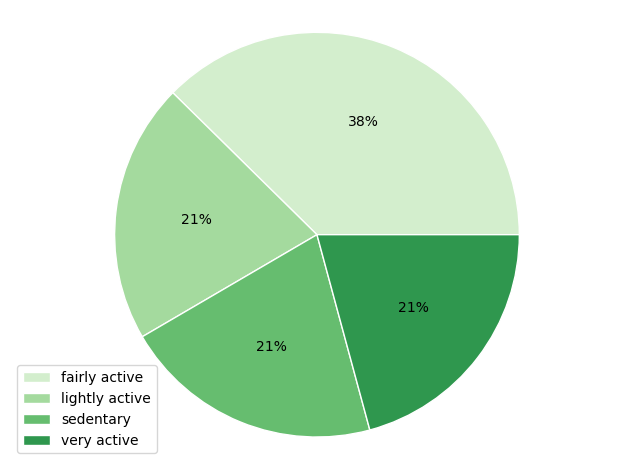

In [16]:
labels = list(user_type_percentage['user_steps'])
sizes = [38.0, 21.0, 21.0, 21.0]
colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(sizes)))

pie = plt.pie(sizes, colors=colors, radius=4, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%.0f%%')
plt.legend( labels, loc="lower left")
plt.axis('equal')
plt.tight_layout()

plt.show()

#### this result shows that the distribution of the various group of user is fairly even which means all kinds of users use smart devices 

### Days of the week users sleep more and are more active
using the date column, weekdays, the average steps walked and minutes sleeped by weekday will be calculated

In [17]:
#convert date to datetime format
daily_activity_sleep['Date'] = pd.to_datetime(daily_activity_sleep['Date'])
# convert date to weekdays for grouping
daily_activity_sleep['Days'] = daily_activity_sleep['Date'].dt.day_name()
daily_activity_sleep['Days']

0        Tuesday
1      Wednesday
2         Friday
3       Saturday
4         Sunday
         ...    
405     Saturday
406       Sunday
407       Monday
408      Tuesday
409    Wednesday
Name: Days, Length: 410, dtype: object

In [18]:
# group steps and sleep by weekdays
weekdays_steps_sleep = daily_activity_sleep.groupby('Days')[['TotalSteps', 'TotalMinutesAsleep']].mean()
weekdays_steps_sleep

,TotalSteps,TotalMinutesAsleep
Days,,
Friday,7901.403509,405.421053
Monday,9273.217391,419.500000
Saturday,9871.122807,419.070175
Sunday,7297.854545,452.745455
Thursday,8183.515625,401.296875
Tuesday,9182.692308,404.538462
Wednesday,8022.863636,434.681818


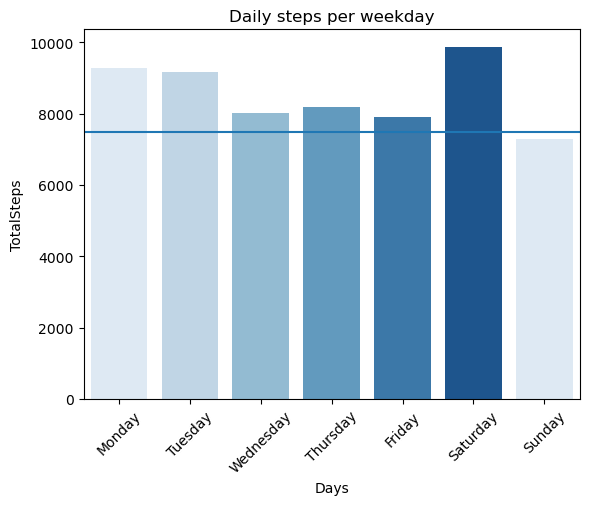

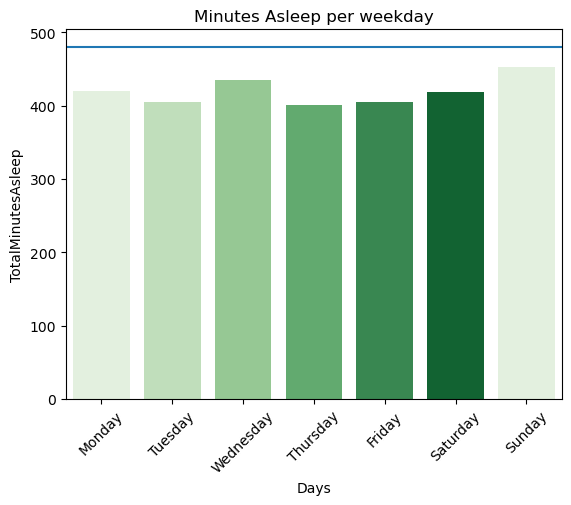

In [19]:
#plot a graph of steps and minutes asleep per day
weekdays_steps_sleep = weekdays_steps_sleep.reset_index()
palette = sns.color_palette('Blues')
palette2 = sns.color_palette('Greens')
weekdays =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(x = 'Days', y = 'TotalSteps', data = weekdays_steps_sleep, order = weekdays, palette = palette)
# add line
plt.axhline(7500)
plt.title('Daily steps per weekday')
plt.xticks(rotation =45)
plt.show()
ax = sns.barplot(x = 'Days', y = 'TotalMinutesAsleep', data = weekdays_steps_sleep, order = weekdays, palette = palette2)
plt.axhline(480)
plt.title('Minutes Asleep per weekday')
plt.xticks(rotation =45)
plt.show()

From the graph the following can be observed:
* Users are work the daily recommened steps of 7500 except on Sundays
* Users don't sleep the recommended hours of 8 hours

###### Narrow down to check what of the day users are more active


In [20]:
# create date and time column
hourly_steps['Date'] = pd.to_datetime(hourly_steps['ActivityHour']).dt.date
hourly_steps['Time'] = pd.to_datetime(hourly_steps['ActivityHour']).dt.time
hourly_steps.drop(['ActivityHour'], axis = 1, inplace = True)
hourly_steps.head()

,Id,StepTotal,Date,Time
0,1503960366,373,2016-04-12,00:00:00
1,1503960366,160,2016-04-12,01:00:00
2,1503960366,151,2016-04-12,02:00:00
3,1503960366,0,2016-04-12,03:00:00
4,1503960366,0,2016-04-12,04:00:00


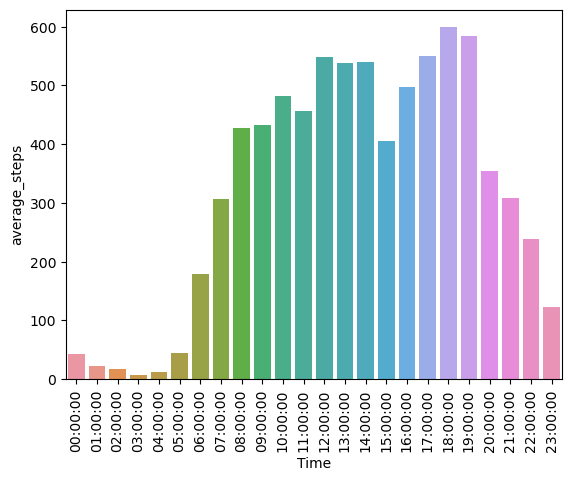

In [21]:
#plot group steps by time and plot a histogram of its mean
mean_hourly_steps = hourly_steps.groupby('Time').agg(average_steps =('StepTotal', 'mean'))
mean_hourly_steps = mean_hourly_steps.reset_index()
# plot bar graph
sns.barplot(x = 'Time', y = 'average_steps', data = mean_hourly_steps)
sns.diverging_palette(145, 300, s=60, as_cmap=True)
plt.xticks(rotation = 90)
plt.show()

From the graph we can that users are active from 8am - 7pm, more active during lunch from 12pm - 2pm and uring closing hours from 5pm - 7pm

#### correlation

Determine whether there's a correlation between:
* daily steps and daily sleep
* daily steps and calories

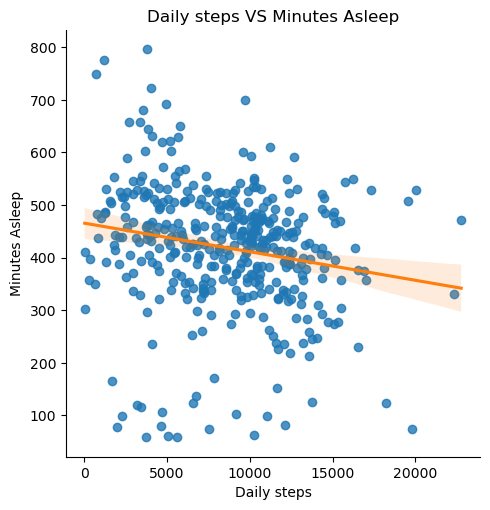

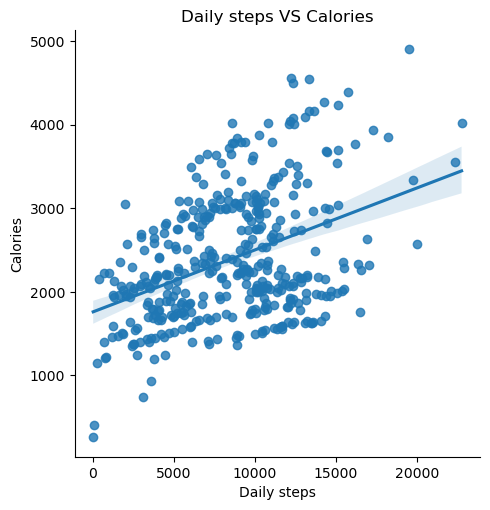

In [22]:
sns.lmplot(x = 'TotalSteps', y = 'TotalMinutesAsleep', data = daily_activity_sleep,
            y_jitter = 0.03, line_kws={"color": "C1"})
plt.title('Daily steps VS Minutes Asleep')
plt.xlabel('Daily steps')
plt.ylabel('Minutes Asleep')
plt.show()
sns.lmplot(x = 'TotalSteps', y = 'Calories', data = daily_activity_sleep)
plt.title('Daily steps VS Calories')
plt.xlabel('Daily steps')
plt.ylabel('Calories')
plt.show()

In [23]:
cor1 = daily_activity_sleep['TotalSteps'].corr(daily_activity_sleep['TotalMinutesAsleep'])
print('The correclation between steps and time asleep is : ', cor1)
cor2 = daily_activity_sleep['TotalSteps'].corr(daily_activity_sleep['Calories'])
print('The correclation between steps and calories is : ', cor2)

The correclation between steps and time asleep is :  -0.1903439166676316
The correclation between steps and calories is :  0.4063006759209672


From the graph we can see that:
* There's little to no correlation between steps taken and time asleep
* There's a positive correlation between steps taken and calories

### Usage of Smart Device by days
To plan a marketing strategy and see what features would benefit the use of smart devices.

Grouping users into categories according to the days they use their devices
* high use - users who use from 21 - 31 days
* moderate use - users who use from 20 - 10 days
* low use - users who use from 1 - 10 days

In [24]:
#count number of days used by each user
users = daily_activity_sleep.groupby('Id')['Days'].count()
users = users.reset_index()
users.head()

,Id,Days
0,1503960366,25
1,1644430081,4
2,1844505072,3
3,1927972279,5
4,2026352035,28


In [25]:
#group the users
Usage = []
for days in users['Days']:
    if days >= 21:
        Usage.append('high use')
    elif days >= 10:
        Usage.append('moderate use')
    else:
        Usage.append('low use')
users['Usage'] = Usage
users.head()

,Id,Days,Usage
0,1503960366,25,high use
1,1644430081,4,low use
2,1844505072,3,low use
3,1927972279,5,low use
4,2026352035,28,high use


Determine the percentage of usage

In [26]:
#group by usage
users_total = users.groupby('Usage').agg(total_count = ('Days' ,'count'))
users_total = users_total.reset_index()
users_total['total_percent'] = users_total['total_count']/ np.sum(users_total['total_count'])
users_total['labels'] = users_total['total_percent'] * 100
users_total.drop(['total_count'], axis = 1, inplace = True)
users_total

,Usage,total_percent,labels
0,high use,0.500,50.0
1,low use,0.375,37.5
2,moderate use,0.125,12.5


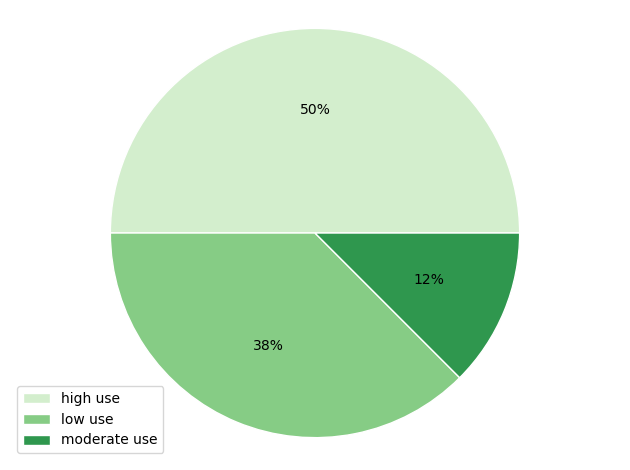

In [27]:
labels = list(users_total['Usage'])
sizes = list(users_total['total_percent'])
colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(sizes)))

pie = plt.pie(sizes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%.0f%%')
plt.legend( labels, loc="lower left")
plt.axis('equal')
plt.tight_layout()

plt.show()

We see that
* 50% of the users use their smart device for more than 20 days 
* 12% of the users use their smart device for more than 10 days 
* 37% of the users use for less than 10 days

### Usage of Smart Device by Minutes


In [28]:
#merge users with daily activity
daily_use_merge  = pd.merge(left = daily_activity, right = users, how = 'inner', left_on = 'Id', right_on = 'Id')
daily_use_merge.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Days,Usage
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,high use
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,high use
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,high use
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,high use
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,high use


Group the amount of minutes users wore their smart devices daily into 3 categories:
* All day - Devices worn all day
* More than half a day - devies worn more than half a day
* Les than half a day - devies worn for less than half a day

In [29]:
# add up all the minutes worn
daily_use_merge['total_minutes'] = daily_use_merge['VeryActiveMinutes'] + daily_use_merge['FairlyActiveMinutes'] + daily_use_merge['LightlyActiveMinutes'] + daily_use_merge['SedentaryMinutes']
#calculate percentage worn
daily_use_merge['percent_minute_worn'] = round((daily_use_merge['total_minutes'] / 1440) * 100, 2)
worn = []
for percent in daily_use_merge['percent_minute_worn']:
    if percent == 100:
        worn.append('All day')
    elif percent >= 50:
        worn.append('More than half a day')
    else:
        worn.append('Less than half a day')
daily_use_merge['worn'] = worn
daily_use_merge.head()



,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Days,Usage,total_minutes,percent_minute_worn,worn
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,high use,1094,75.97,More than half a day
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,high use,1033,71.74,More than half a day
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,high use,1440,100.00,All day
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,high use,998,69.31,More than half a day
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,high use,1040,72.22,More than half a day


#### Show the total of users and percentage of minutes worn the device taking into consideration the three categories created.

#### filter by category of daily users to show the difference of daily use and time use.

In [30]:
#percentage of users per how much worn
minute_worn = daily_use_merge.groupby('worn').agg(total = ('Date', 'count'))
minute_worn = minute_worn.reset_index()
minute_worn['total_percent'] = minute_worn['total'] / np.sum(minute_worn['total'])
minute_worn['label'] = round(minute_worn['total_percent'] * 100, 1)
minute_worn.drop(['total'], axis = 1, inplace = True)
print(minute_worn)

# percentage of users for minute worn when usage is high
minute_worn_highuse = daily_use_merge[daily_use_merge['Usage'] == 'high use']
minute_worn_high_use = minute_worn_highuse.groupby('worn').agg(total = ('Date', 'count'))
minute_worn_high_use = minute_worn_high_use.reset_index()
minute_worn_high_use['total_percent'] = minute_worn_high_use['total'] / np.sum(minute_worn_high_use['total'])
minute_worn_high_use['label'] = round(minute_worn_high_use['total_percent'] * 100, 1)
minute_worn_high_use.drop(['total'], axis = 1, inplace = True)
print(minute_worn_high_use)

# percentage of users for minute worn when usage is moderate
minute_worn_highuse = daily_use_merge[daily_use_merge['Usage'] == 'moderate use']
minute_worn_moduse = minute_worn_highuse.groupby('worn').agg(total = ('Date', 'count'))
minute_worn_moduse = minute_worn_moduse.reset_index()
minute_worn_moduse['total_percent'] = minute_worn_moduse['total'] / np.sum(minute_worn_moduse['total'])
minute_worn_moduse['label'] = round(minute_worn_moduse['total_percent'] * 100, 1)
minute_worn_moduse.drop(['total'], axis = 1, inplace = True)
print(minute_worn_moduse)

# percentage of users for minute worn when usage is low
minute_worn_highuse = daily_use_merge[daily_use_merge['Usage'] == 'low use']
minute_worn_lowuse = minute_worn_highuse.groupby('worn').agg(total = ('Date', 'count'))
minute_worn_lowuse = minute_worn_lowuse.reset_index()
minute_worn_lowuse['total_percent'] = minute_worn_lowuse['total'] / np.sum(minute_worn_lowuse['total'])
minute_worn_lowuse['label'] = round(minute_worn_lowuse['total_percent'] * 100, 1)
minute_worn_lowuse.drop(['total'], axis = 1, inplace = True)
print(minute_worn_lowuse)

                   worn  total_percent  label
0               All day       0.364656   36.5
1  Less than half a day       0.035063    3.5
2  More than half a day       0.600281   60.0
                   worn  total_percent  label
0               All day       0.067568    6.8
1  Less than half a day       0.043243    4.3
2  More than half a day       0.889189   88.9
                   worn  total_percent  label
0               All day       0.266667   26.7
1  Less than half a day       0.040000    4.0
2  More than half a day       0.693333   69.3
                   worn  total_percent  label
0               All day       0.802239   80.2
1  Less than half a day       0.022388    2.2
2  More than half a day       0.175373   17.5


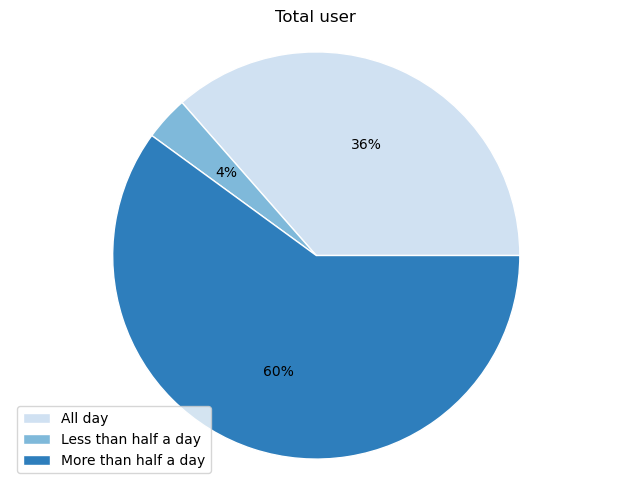

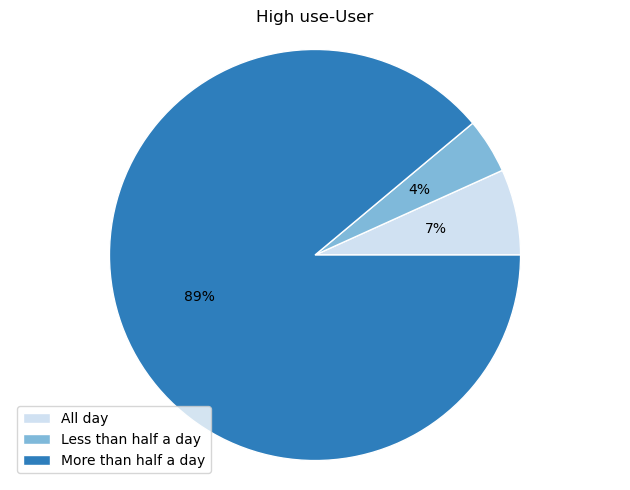

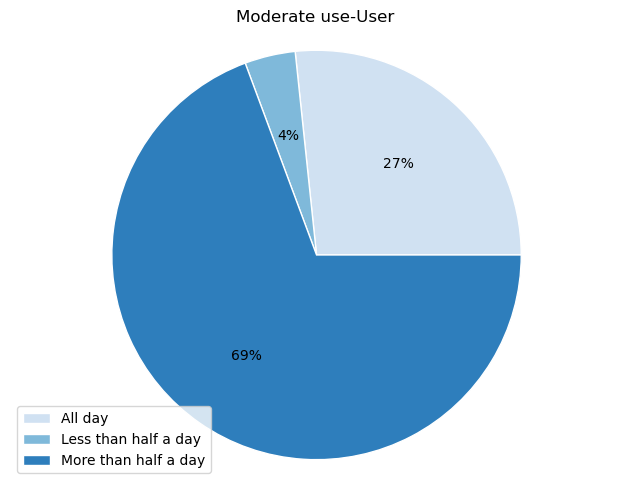

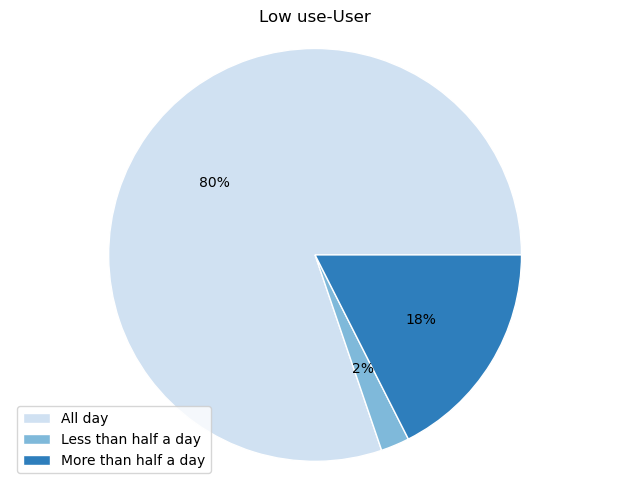

In [31]:

#Total user
labels = list(minute_worn['worn'])
sizes = list(minute_worn['total_percent'])
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(sizes)))

pie = plt.pie(sizes, colors=colors, radius=4, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%.0f%%')
plt.legend( labels, loc="lower left")
plt.axis('equal')
plt.tight_layout()
plt.title('Total user')
plt.show()

# high use user
labels = list(minute_worn['worn'])
sizes = list(minute_worn_high_use['total_percent'])
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(sizes)))

pie = plt.pie(sizes, colors=colors, radius=4, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%.0f%%')
plt.legend( labels, loc="lower left")
plt.axis('equal')
plt.tight_layout()
plt.title('High use-User')
plt.show()

# moderate use user
labels = list(minute_worn['worn'])
sizes = list(minute_worn_moduse['total_percent'])
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(sizes)))

pie = plt.pie(sizes, colors=colors, radius=4, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%.0f%%')
plt.legend( labels, loc="lower left")
plt.axis('equal')
plt.tight_layout()
plt.title('Moderate use-User')
plt.show()
# low use user
labels = list(minute_worn['worn'])
sizes = list(minute_worn_lowuse['total_percent'])
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(sizes)))

pie = plt.pie(sizes, colors=colors, radius=4, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%.0f%%')
plt.legend( labels, loc="lower left")
plt.axis('equal')
plt.tight_layout()
plt.title('Low use-User')
plt.show()

Per our plots we can see that 36% of the total of users wear the device all day long, 60% more than half day long and just 4% less than half day.
* High users - Just 6.8% of the users that have used their device between 21 and 31 days wear it all day. 88.9% wear the device more than half day but not all day.

* Moderate users are the ones who wear the device less on a daily basis.

* Being low users who wear more time their device the day they use

# Conclusion
Due to the inadequate amount of sample data, the data is might be biased and another analysis is adviced to be taken and with data from BellaBeat


Based on the trends on daily users habits we also realized that just 50% of the users use their device on a daily basis and that just 36% of the users wear the device all time the day they used it. We can continue promote Bellabeat's products features:

* Water-resistant
* Long-lasting batteries
* Fashion/ elegant products

From the analysis some trends were noticed that can be used by the marketing department. They are :
* 1. Daily notification on steps and posts on app : We classified users into 4 categories and saw that the average of users walk more than 7,500 steps daily besides Sundays. We can encourage customers to reach at least daily recommended steps by CDC - 8.000 sending them alarms if they haven't reached the steps and creating also posts on our app explaining the benefits of reaching that goal. As CDC explains the more steps you walk the lower is the mortality rate. We also saw a positive correlation between steps and calories.
* 3. Notification and sleep techniques : Based on our results we can see that users sleep less than 8 hours a day. They could set up a desired time to go to sleep and receive a notification minutes before to prepare to sleep. Also offer helpfull resources to help customers sleep - ex. breathing advises, podcasts with relaxing music, sleep techniques.
* 2. Reward system : We are aware that some people don't get motivated by notifications so we could create a kind of game on our app for a limited period of time. Game would consist in reaching different levels based on amount of steps walked every day. You need to maintain activity level for a period of time (maybe a month) to pass to the next level. For each level you would win certain amount of stars that would be redeemable for merchandise or discount on other Bellabeat products.